In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras

R:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
mnist = pd.read_csv(r"C:\Users\rhuta\Downloads\MNIST.csv")

In [3]:
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mnist.label.value_counts() #Label is target variable.

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [5]:
# we will do 2 parts
#Plot and understand this is image data
#Build the neural nets.

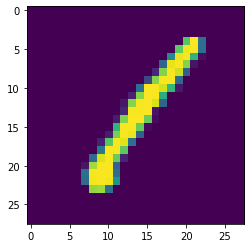

In [6]:
mnist1 = mnist.iloc[:,1::]
abcd = mnist1.iloc[0]
abcd = np .array(abcd)
abcd = abcd.reshape(28 ,28 )
plt.imshow(abcd)

In [7]:
abcd

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 188, 255,  94,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,
          0,   0],
       [  

In [8]:
mnist1

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


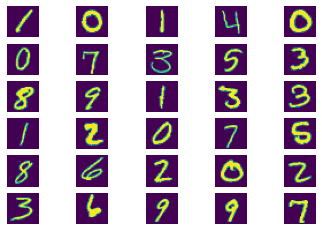

In [9]:
#to see the images of 1st 30 records
mnist1 = mnist.iloc[:,1:786]
mnist1 = np.array(mnist1)
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.imshow(mnist1[i,:].reshape(28,28))
    plt.axis('off')

In [10]:
mnist.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [11]:
#Sampling

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
mnist_train , mnist_test = train_test_split(mnist, test_size=0.2)

In [14]:
mnist_train_x = mnist_train.iloc[: , 1::]
mnist_train_y = mnist_train.iloc[: , 0]

In [15]:
mnist_test_x = mnist_test.iloc[: , 1::]
mnist_test_y = mnist_test.iloc[: , 0]

In [16]:
mnist_train_x = tf.keras.utils.normalize(mnist_train_x)
mnist_test_x =  tf.keras.utils.normalize(mnist_test_x)

In [29]:
model = tf.keras.models.Sequential()    #Initialize the model
model.add(tf.keras.layers.Dense(128 , activation = tf.nn.relu)) #1st hidden layer
model.add(tf.keras.layers.Dense(128 , activation = tf.nn.relu)) #2nd hidden layer
model.add(tf.keras.layers.Dense(128 , activation = tf.nn.relu)) #3rd hidden layer
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) #softmax activation function for output layer 10 is not a hyperparameter
adam = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer='adam' , loss = 'sparse_categorical_crossentropy' , metrics=['accuracy'])

In [30]:
mnist_train_x = np.array(mnist_train_x)
mnist_train_y =np.array(mnist_train_y)

In [31]:
model.fit(mnist_train_x , mnist_train_y , epochs = 12, batch_size = 128 , validation_split=0.2)
#Batch size should be power of 2

Epoch 1/12
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6745 - loss: 1.2200 - val_accuracy: 0.9009 - val_loss: 0.3370
Epoch 2/12
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9177 - loss: 0.2866 - val_accuracy: 0.9341 - val_loss: 0.2334
Epoch 3/12
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9422 - loss: 0.1983 - val_accuracy: 0.9412 - val_loss: 0.1976
Epoch 4/12
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9572 - loss: 0.1439 - val_accuracy: 0.9533 - val_loss: 0.1660
Epoch 5/12
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9650 - loss: 0.1165 - val_accuracy: 0.9466 - val_loss: 0.1739
Epoch 6/12
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9717 - loss: 0.0935 - val_accuracy: 0.9594 - val_loss: 0.1356
Epoch 7/12
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9762 - loss: 0.0806 - val_accuracy: 0.9621 - val_loss: 0.1317
Epoch 8/12
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9808 - loss: 0.0644 - val_accuracy: 0.

In [32]:
pred_values = model.predict(mnist_test_x)

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step


In [33]:
pred_values

array([[2.9154853e-12, 3.8943864e-07, 1.1423061e-07, ..., 4.3688047e-05,
        2.2697534e-06, 2.5705528e-02],
       [1.4322863e-11, 4.6256683e-13, 4.3129424e-11, ..., 1.5366971e-12,
        9.9999785e-01, 2.2115647e-07],
       [3.8430075e-11, 1.4602119e-04, 1.4859066e-06, ..., 1.0689977e-04,
        2.9899059e-02, 9.5370513e-01],
       ...,
       [7.3563837e-12, 2.9720071e-10, 2.5076730e-07, ..., 9.9999952e-01,
        7.4262024e-10, 2.4065855e-07],
       [8.0090678e-07, 5.7387009e-05, 1.2922960e-05, ..., 1.6749796e-02,
        8.5533020e-04, 9.6845073e-01],
       [1.9772897e-10, 6.9090384e-12, 2.2325748e-12, ..., 7.9690503e-15,
        5.3320221e-08, 2.0391600e-11]], dtype=float32)

In [34]:
np.sum(pred_values[0])

1.0

In [35]:
pred_classes = np.argmax(pred_values , axis=1)
pred_classes

array([4, 8, 9, ..., 7, 9, 5], dtype=int64)

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
cm = confusion_matrix(mnist_test_y , pred_classes) 
cm

array([[803,   0,   0,   1,   3,   3,   4,   1,   2,   2],
       [  0, 952,   5,   1,   1,   0,   0,   1,   0,   0],
       [  4,   1, 760,   1,  10,   0,   0,   9,   5,   1],
       [  0,   0,  10, 839,   0,  10,   0,   3,   4,   4],
       [  0,   1,   3,   1, 776,   1,   5,   1,   5,  16],
       [  2,   0,   0,   8,   3, 767,   4,   1,   3,   6],
       [  7,   1,   1,   1,   2,   5, 788,   0,   0,   0],
       [  0,   1,   4,   1,   0,   0,   1, 873,   1,  11],
       [  4,   2,   5,   5,   1,   9,   2,   1, 768,   6],
       [  1,   0,   0,   4,   8,   3,   0,   7,   3, 831]], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(mnist_test_y , pred_classes)*100

97.10714285714286

In [40]:
model.history